**_워드 임베딩?_**    
-> 텍스트를 컴퓨터가 이해할 수 있도록 수치화하는 하나의 방법   
-> 각 단어를 인공 신경망 학습을 통해 벡터화함

-----

# 1. 워드 임베딩
- 단어를 벡터로 표현하는 방법.
- 단어를 밀집 표현으로 변환

## 1.1 희소 표현(Sparse Representation) 
벡터 또는 행렬의 값이 대부분 0으로 표현되는 방법.   
ex) 원-핫 인코딩을 통해 나온 원-핫 벡터는 표현하고자 하는 단어의 인덱스만 1이고 나머지 인덱스는 전부 0으로 표현   
ex) DTM : 특정 문서에 다수 등장한 단어가 다른 많은 문서에서는 등장하지 않으면 행렬의 많은 값이 0이 된다.   
- 문제점   
    1) 단어 개수가 늘어나면 벡터의 차원이 한없이 커진다. -> 공간낭비   
    2) 단어의 의미를 표현하지 못한다.
    3) 단어 벡터 간 유의미한 유사도를 계산할 수 없다. 
    
## 1.2 밀집 표현(Dense Representation)
사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞추며, 벡터값은 0과 1만이 아니라 실수값을 갖는다.

## 1.3 워드 임베딩(Word Embedding)
단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법.   
이 밀집 벡터를 워드 임베딩 과정을 통해 나온 결과라고 하여 임베딩 벡터라고도 한다.
<img src="./09-1.png">

# 2. 워드투벡터(word2Vec)
단어 벡터 간 유의미한 유사도를 파악할 수 있도록 단어의 의미를 수치화하는 대표적인 방법

### 분산 표현
희소 표현 방법의 대안으로, 단어의 의미를 다차원 공간에 벡터화하는 표현 방법.   
분포 가설을 이용하여 **텍스트를 학습**하고, 단어의 의미를 벡터의 여러 차원에 분산하여 표현.
- 분포 가설 : 비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다.   

분산 표현을 이용하여 단어 간 의미적 유사성을 벡터화하는 작업을 **워드 임베딩**이라 부르며, 이렇게 표현된 벡터를 **임베딩 벡터**라 한다.   

#### Word2Vec의 학습 방식에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식이 있다.

## 1) CBOW(Continuous Bag of Words)
주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법    
- 윈도우 : 중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지에 대한 범위   
- 윈도우 크기가 n이라면, 실제 중심 단어를 예측하기 위해 참고하려고 하는 주변 단어의 개수는 2n개이다.   

투사층에서 입력 벡터인 2n개의 벡터의 평균을 구한다.
  
## 2) Skip-gram
중간에 있는 단어들을 입력으로 주변 단어들을 예측하는 방법   
중심 단어에 대해서 주변 단어를 예측하므로 투사층에서 벡터들의 평균을 구하는 과정이 없다.

**_1), 2)에 대한 추가설명은 꼭 교재 참고!!(그림이 많고 책에 나온 내용을 이해하는 게 중요해서 따로 요약X)_**
- CBOW, Skip-gram 설명 : https://wikidocs.net/22660
    
## NNLM  VS Word2Vec

<img src="./09-2.png">

### NNLM
- 단어 벡터 간 유사도를 구할 수 있도록 워드 임베딩 개념 도입
- 다음 단어를 예측하는 언어 모델 구현이 목적 -> 다음 단어를 예측
- 예측 단어의 이전 단어들만을 참고
- 활성화 함수가 있는 은닉층 존재

### Word2VEC
- 워드 임베딩 자체에 집중. NNLM의 느린 학습 속도와 정확도 개선
- 워드 임베딩 자체가 목적. -> 중심 단어를 예측
- 예측 단어의 전, 후 단어들을 모두 참고
- 활성화 함수가 있는 은닉층 제거 -> 학습 속도에 강점.

# 3. 영어/한국어 Word2Vec 실습
gensim 패키지에서 제공하는 이미 구현된 Word2Vec을 사용

## 3.1 영어 Word2Vec 만들기

### 3.1.2 훈련 데이터 전처리

In [2]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [3]:
# 훈련 데이터 다운로드 - xml문서형식
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial\
/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x192314fc4c0>)

> 현재 경로로 데이터가 다운로드된다.   
\<content>, \</content> 사이의 내용들은 전처리하고, Laughter나 Applause와 같은 배경음을 나타내는 단어도 제거해야 한다.

In [7]:
# 훈련 데이터 전처리 코드
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)
target_text

In [11]:
# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

> **xpath문법 참고**
> - https://velog.io/@mjhuh263/TIL-23-HTML-XPATH-%EB%AC%B8%EB%B2%95%EA%B3%BC-selenium%EC%97%90-XPATH-%EC%9D%B4%EC%9A%A9%ED%95%98%EA%B8%B0

In [12]:
# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

> **re.sub 참고**
> - https://clolee.tistory.com/17

> **정규표현식 참고**
> - https://wikidocs.net/4308
> - https://uipath.tistory.com/91

In [15]:
# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [5]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [6]:
# 샘플 3개만 출력 - 토큰화 수행되었음을 확인 가능
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


### 3.1.2 Word2Vec 모델

In [17]:
#!pip install gensim

     ---------------------------------------- 24.0/24.0 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 986.3/986.3 kB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 67.1/67.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20431 sha256=271ce496703c0bbf8733c33a58fbb681b0cfec0f4629f1db3611f31b48764c85
  Stored in directory: c:\users\hkny0\appdata\local\pip\cache\wheels\99\66\48\d7ce0c6927f6abf167bbcdee537affc7b92c03632f78028411
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3514 sha256=fbe10f943088256eca45f6006489281b436e6af4c72fe04642693fd894288214
  Stored in directory: c:\users\hkny0\appdata\local\pip\cache\wheels\d9\c7\71\db1d4646d963b34c530667501d3d6f34c0825eaffae2f0f2cb
Successfully built fst-pso miniful


In [23]:
# Word2Vec 훈련시키기
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

> Word2Vec의 하이퍼파라미터
> - vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
> - window = 컨텍스트 윈도우 크기
> - min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습X)
> - workers = 학습을 위한 프로세스 수
> - sg = 0은 CBOW, 1은 Skip-gram.

> **오류해결** : __init__() got an unexpected keyword argument 'size'
> - https://taepseon.tistory.com/165

In [22]:
# model.wv.most_similar : 입력한 단어에 대해서 가장 유사한 단어들을 출력
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8362213969230652), ('guy', 0.8056905269622803), ('boy', 0.7336509227752686), ('lady', 0.7292954325675964), ('girl', 0.7224241495132446), ('soldier', 0.6950802803039551), ('kid', 0.6896971464157104), ('gentleman', 0.6890862584114075), ('poet', 0.6707367300987244), ('rabbi', 0.6681267023086548)]


In [25]:
# Word2Vec 모델 저장하고 로드하기
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [26]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8531349897384644), ('guy', 0.8128985166549683), ('lady', 0.7836226224899292), ('boy', 0.7554062604904175), ('girl', 0.7258740067481995), ('gentleman', 0.7241212725639343), ('kid', 0.7038401365280151), ('soldier', 0.695353627204895), ('poet', 0.6924022436141968), ('rabbi', 0.672540545463562)]


## 3.2 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [30]:
# 네이버 영화 리뷰 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master\
/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x192568e04c0>)

In [32]:
train_data = pd.read_table('ratings.txt')
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [33]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [34]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [36]:
# 결측값 제거
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
print(len(train_data)) # 리뷰 개수 출력

False
199992


In [37]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5] # 상위 5개 출력

C:\Users\hkny0\AppData\Local\Temp\ipykernel_14704\3523926270.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


> str.replace의 argument에 관한 future warning   
> - The default value of regex will change from True to False in a future version.
> - https://stackoverflow.com/questions/66603854/futurewarning-the-default-value-of-regex-will-change-from-true-to-false-in-a-fu

In [39]:
## 불용어 제거
from tqdm import tqdm

# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████| 199992/199992 [11:35<00:00, 287.75it/s]


> **<tqdm 사용법>**
> - 반복문에서 진행률을 progress bar로 표혀해주고 남은 시간 정보까지 알려주는 모듈
> - https://zephyrus1111.tistory.com/305

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


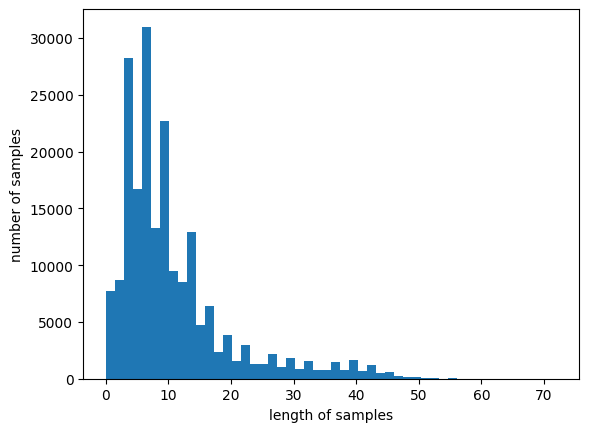

In [40]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [44]:
# Word2Vec으로 토큰화 된 네이버 영화 리뷰 데이터를 학습
from gensim.models import Word2Vec

model2 = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [48]:
# 완성된 임베딩 매트릭스의 크기 확인
model2.wv.vectors.shape

(16477, 100)

In [46]:
# '최민식'과 유사한 단어 출력
print(model.wv.most_similar("최민식"))

[('안성기', 0.8665849566459656), ('최민수', 0.8626821041107178), ('송강호', 0.8483191728591919), ('양동근', 0.847623884677887), ('한석규', 0.8422004580497742), ('김명민', 0.8347287178039551), ('홉킨스', 0.8315922617912292), ('이정재', 0.8312536478042603), ('정재영', 0.8311538100242615), ('박중훈', 0.8263603448867798)]


## 3.3 사전 훈련된 Word2Vec 임베딩(Pre-trained Word2Vec embedding) 소개
갖고 있는 훈련 데이터의 양이 부족한 상황이라면, 위키피디아 등의 방대한 데이터로 사전에 훈련된 워드 임베딩(pre-trained word embedding vector)을 가지고 와서 해당 벡터들의 값을 원하는 작업에 사용 할 수도 있다.

구글이 제공하는 사전 훈련된 Word2Vec 모델을 사용하는 방법에 대해 알아보자.   
- 모델 다운로드 경로 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit   


In [60]:
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [55]:
# 모델의 크기 확인
print(word2vec_model.vectors.shape)

(3000000, 300)


In [56]:
# 두 단어의 유사도 계산 연습
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))

0.40797037
0.057204384


In [59]:
# 단어 'book'의 벡터 출력
print(word2vec_model['book'][:20])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625]


# 4. 네거티브 샘플링을 이용한 Word2Vec 구현(Skip-Gram with Negative Sampling, SGNS)

## 4.1 네거티브 샘플링(Negative Sampling)
보통의 Word2Vec는 단어 집합의 크기가 수만 이상에 달한다면 학습하기 꽤나 무거운 모델이 된다. **네거티브 샘플링**은 Word2Vec이 학습 과정에서 전체 단어 집합이 아니라 일부 단어 집합에만 집중할 수 있도록 하는 방법. 기존의 단어 집합을 이진 분류 문제를 위한 데이터셋으로 변환한다.

## 4.2 네거티브 샘플링 Skip-Gram(Skip-Gram with Negative Sampling, SGNS)